<a href="https://colab.research.google.com/github/whkaikai/-python-/blob/main/%E7%81%B0%E5%BA%A6%E5%8F%98%E6%8D%A2_%E4%BC%BD%E9%A9%AC%E5%8F%98%E6%8D%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] matplotlib版本为：3.2.2
--------
 [[  0.5  50.5 100.5 150.5]
 [  0.5  50.5 100.5 150.5]
 [  0.5  50.5 100.5 150.5]
 [  0.5  50.5 100.5 150.5]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


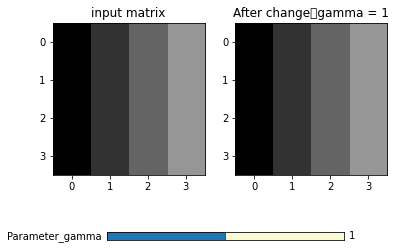

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def set_chinese():   # 中文显示工具函数
	import matplotlib
	print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
	matplotlib.rcParams['font.sans-serif'] = ['FangSong']
	matplotlib.rcParams['axes.unicode_minus'] = False

def gamma_trans(input, gamma=2, eps=0 ):
    return 255. * (((input + eps)/255.) ** gamma)


def update_gamma(val):
    gamma = slider1.val
    output = gamma_trans(input_arr, gamma=gamma, eps=0.5)
    print("--------\n", output)
    ax1.set_title("After change,gamma = " + str(gamma))
    ax1.imshow(output, cmap='gray', vmin=0, vmax=255)


if __name__ == '__main__':

    set_chinese()

    input_arr = np.array( [ [0,  50,  100, 150],
                            [0,  50,  100, 150],
                            [0,  50,  100, 150],
                            [0,  50,  100, 150]] )

    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    ax0.set_title("input matrix")
    ax0.imshow(input_arr, cmap='gray',vmin=0,vmax=255)
    ax1 = fig.add_subplot(122)
    plt.subplots_adjust(bottom=0.3)
    s1 = plt.axes([0.25, 0.1, 0.55, 0.03], facecolor='lightgoldenrodyellow')
    slider1 = Slider(s1, 'Parameter_gamma', 0.0, 2.0,
                     valfmt='%.f', valinit=1.0, valstep=0.1)
    slider1.on_changed(update_gamma)
    slider1.reset()
    slider1.set_val(1)

    plt.show()


[INFO] matplotlib版本为：3.2.2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_te

[[  0.   0.   1. ... 254. 255. 255.]
 [  0.   0.   1. ... 254. 255. 255.]
 [  0.   0.   1. ... 254. 255. 255.]
 ...
 [  0.   0.   1. ... 254. 255. 255.]
 [  0.   0.   1. ... 254. 255. 255.]
 [  0.   0.   1. ... 254. 255. 255.]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_

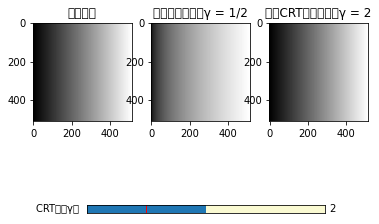

In [5]:
# 较正crt失真值

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons


def set_chinese():   # 中文显示工具函数
	import matplotlib
	print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
	matplotlib.rcParams['font.sans-serif'] = ['FangSong']
	matplotlib.rcParams['axes.unicode_minus'] = False

def gamma_trans(input, gamma=2, eps=0 ):
    return 255. * (((input + eps)/255.) ** gamma)

def crt_distortion(input, gamma=2):  # 模拟CRT失真（做了归一化）
    return 255. * ((input/255.) ** gamma)


def update_gamma(val):

    gamma = slider1.val  # 获取"失真γ"


    # 图像送入CRT前，先做伽马变换预处理
    gamma_ = 1 / gamma   #  "矫正γ" 为 "失真γ" 的倒数
    correct_img = gamma_trans(gray_img, gamma_, 0)  #
    ax1.set_title("伽马矫正，矫正γ = 1/" + str(round(gamma,2)))
    ax1.imshow(correct_img, cmap='gray',vmin=0,vmax=255)

    # 简易模拟CRT输出
    output = crt_distortion(correct_img, gamma)
    print(output)
    ax2.set_title("模拟CRT输出，失真γ = " + str(round(gamma,2)))
    ax2.imshow(output, cmap='gray',vmin=0,vmax=255)


if __name__ == '__main__':
    set_chinese()

    gray_img = np.asarray(Image.open('/content/intensity_ramp.tif').convert('L'))

    fig = plt.figure()
    ax0 = fig.add_subplot(131)
    ax1 = fig.add_subplot(132)
    ax2 = fig.add_subplot(133)


    ax0.set_title("原始图片")
    ax0.imshow(gray_img, cmap='gray',vmin=0,vmax=255)


    plt.subplots_adjust(bottom=0.3)
    s1 = plt.axes([0.25, 0.1, 0.55, 0.03], facecolor='lightgoldenrodyellow')
    slider1 = Slider(s1, 'CRT失真γ： ', 0.0, 4.0,
                      valfmt='%.f', valinit=1.0, valstep=0.1)
    slider1.on_changed(update_gamma)
    slider1.reset()
    slider1.set_val(2)

    plt.show()

[INFO] matplotlib版本为：3.2.2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_te

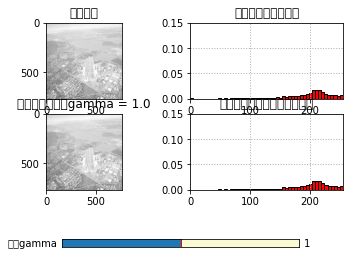

In [8]:
# 提高对比度
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def set_chinese():   # 中文显示工具函数
	import matplotlib
	print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
	matplotlib.rcParams['font.sans-serif'] = ['FangSong']
	matplotlib.rcParams['axes.unicode_minus'] = False

def gamma_trans(input, gamma=2, eps=0 ):
    return 255. * (((input + eps)/255.) ** gamma)


def update_gamma(val):

    # 获取滑块数值，作为γ
    gamma_ = slider1.val

    # 对原图执行γ变换
    output = gamma_trans(gray_img, gamma_, 0.2)

    # 显示γ变换结果图像
    ax3.clear()
    ax3.set_title("伽马变换结果，gamma = " + str(round(gamma_,2)))
    ax3.imshow(output, cmap='gray',vmin=0,vmax=255)
    # 显示γ变换结果图像的灰度分布直方图
    ax4.clear()
    ax4.set_xlim(0, 255)  # 设置x轴分布范围
    ax4.set_ylim(0, 0.15)  # 设置y轴分布范围
    ax4.grid(True, linestyle=':', linewidth=1)
    ax4.set_title('伽马变换后，灰度分布直方图', fontsize=12)
    ax4.hist(output.flatten(),bins=50,density=True,color='r',edgecolor='k')


if __name__ == '__main__':

    set_chinese()

    # 读入原图
    gray_img = np.asarray(Image.open('/content/washed_out.tif').convert('L'))

    # 创建一个显示主体，并分成四个显示区域
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    # 显示原图
    ax1.set_title("原始图片")
    ax1.imshow(gray_img, cmap='gray', vmin=0, vmax=255)

    # 显示原图的灰度分布直方图
    ax2.grid(True, linestyle=':', linewidth=1)
    ax2.set_title('原图灰度分布直方图', fontsize=12)
    ax2.set_xlim(0, 255)  # 设置x轴分布范围
    ax2.set_ylim(0, 0.15)  # 设置y轴分布范围
    ax2.hist(gray_img.flatten(), bins=50,density=True,color='r',edgecolor='k')

    # 在显示主体下方创建滑动条，用于交互控制γ值
    plt.subplots_adjust(bottom=0.3)
    s1 = plt.axes([0.25, 0.1, 0.55, 0.03], facecolor='lightgoldenrodyellow')
    slider1 = Slider(s1, '参数gamma', 0.0, 2.0,
                      valfmt='%.f', valinit=1.0, valstep=0.1)
    slider1.on_changed(update_gamma)
    slider1.reset()
    slider1.set_val(1.0)



    plt.show()